In [1]:
from util import load_data, fdr, plot_report
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import ChainMap

In [2]:
x_train, x_test, y_train, y_test = load_data('var_w2.csv')
x_train.head()

,name_dob_day_since,ssn_day_since,name_count_0_by_30,ssn_dob_count_7,ssn_count_7,homephone_count_14,fulladdress_homephone_count_0_by_14,fulladdress_homephone_count_0_by_30,fulladdress_count_1_by_7,fulladdress_count_1_by_14,...,fulladdress_homephone_count_14,ssn_firstname_count_0_by_30,address_count_1_by_30,name_dob_count_14,ssn_lastname_count_0_by_14,homephone_count_3,ssn_lastname_count_7,ssn_firstname_count_7,name_count_7,ssn_count_0_by_14
479646,0.088153,0.107430,0.316329,-0.055708,-0.058092,-1.011308,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
288103,-0.566630,-0.548689,0.316329,-0.055708,-0.058092,0.135423,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,1.799751,-0.057154,-0.057185,-0.115648,0.124781
611168,0.543653,0.563860,0.316329,-0.055708,-0.058092,-1.011308,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
426261,-0.092150,-0.073241,0.316329,-0.055708,-0.058092,-1.011308,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
699569,0.249476,0.269082,0.316329,-0.055708,-0.058092,0.135423,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781


In [3]:
rf = RandomForestClassifier()
params = {'n_estimators': [25, 50, 100],
          'max_depth': [2, 5, 10, 15],
          'class_weight': ['balanced', None, 'balanced_subsample']}
grid = GridSearchCV(rf, params, cv=2, refit='FDR', 
                    verbose=1, n_jobs=4,
                    scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid.fit(x_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed: 10.0min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [4]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")

The best parameters are {'class_weight': 'balanced_subsample', 'max_depth': 10, 'n_estimators': 50} with a score of 0.51063


In [6]:
pd.DataFrame(grid.cv_results_).filter(
    items=['param_class_weight', 'param_max_depth',
           'param_n_estimators', 'mean_test_FDR',
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_class_weight,param_max_depth,param_n_estimators,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,balanced,2,25,0.480736,0.023100,21,0.743867,0.000240
1,balanced,2,50,0.496949,0.006538,19,0.749466,0.002196
2,balanced,2,100,0.499564,0.003400,16,0.748542,0.001782
3,balanced,5,25,0.507932,0.001308,10,0.760582,0.000074
4,balanced,5,50,0.508368,0.001395,7,0.762359,0.004284
5,balanced,5,100,0.507758,0.000785,13,0.760936,0.002174
6,balanced,10,25,0.507758,0.001308,12,0.762927,0.000322
7,balanced,10,50,0.509850,0.003574,2,0.763519,0.002152
8,balanced,10,100,0.508630,0.001133,5,0.764634,0.001000
9,None,2,25,0.448745,0.010286,27,0.717372,0.005066


In [7]:
dt = RandomForestClassifier(**grid.best_params_)
params = {'max_depth': [5, 10, 15, 20]}
grid_2 = GridSearchCV(dt, params, cv=2, refit='FDR', 
                      verbose=1, n_jobs=4,
                      scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid_2.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:  2.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                      

In [8]:
print(f"The best parameters are {grid_2.best_params_} "
      f"with a score of {grid_2.best_score_:0.5f}")

The best parameters are {'max_depth': 10} with a score of 0.50898


In [10]:
pd.DataFrame(grid_2.cv_results_).filter(
    items=['param_max_depth', 'mean_test_FDR',
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_max_depth,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,5,0.506799,0.000697,2,0.759582,0.004596
1,10,0.508978,0.001831,1,0.764745,0.000911
2,15,0.493375,0.003312,3,0.751461,0.003877
3,20,0.474285,0.003225,4,0.730246,0.004488


FDR: 0.49743238616912017

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197079
           1       0.70      0.45      0.55      2921

    accuracy                           0.99    200000
   macro avg       0.84      0.73      0.77    200000
weighted avg       0.99      0.99      0.99    200000



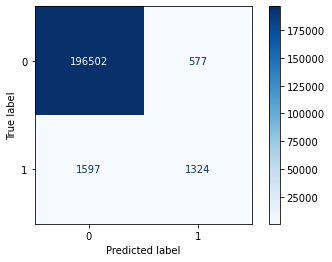

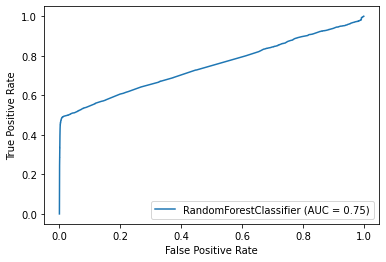

In [13]:
param = ChainMap(grid_2.best_params_, grid.best_params_)
dt = RandomForestClassifier(n_jobs=4, **param).fit(x_train, y_train)
plot_report(dt, x_test, y_test)